In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
X = np.empty([100,2])

In [8]:
X[:,0] = np.random.uniform(low=0.,high=100.,size=100)

In [16]:
X[:,1] = 0.75*X[:,0]+3+np.random.normal(loc=0,scale=10,size=100)

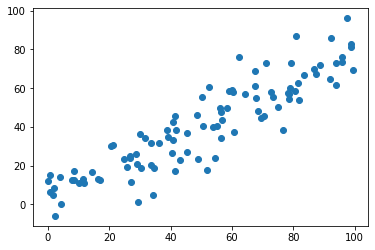

In [18]:
plt.scatter(X[:,0],X[:,1])
np.zeros?

In [21]:
def matrix_mean(square_matrix):
    m = len(square_matrix[0])
    res = np.zeros(m)
    for i in range(0,m):
        res[i] = np.mean(square_matrix[:,i])
    return res
    

In [22]:
matrix_mean(X)

array([50.24825946, 40.65844178])

In [24]:
np.mean?

In [25]:
np.mean(X,axis=0)

array([50.24825946, 40.65844178])

In [26]:
def demean(X):
    return X - np.mean(X,axis=0)

In [27]:
demean(X)

array([[ 28.47104271,  16.05506352],
       [ 28.2751545 ,  13.86089922],
       [ 28.66148961,  19.32492645],
       [-49.48289074, -34.09285542],
       [ 45.47616094,  32.55804555],
       [ 49.07901561,  28.68375233],
       [-48.15027667, -32.18722244],
       [-23.40533483, -16.68342144],
       [  1.52553625, -22.94199563],
       [ 33.2563753 ,  26.08189729],
       [  6.18562301,  -6.69415352],
       [-23.46042804, -15.543871  ],
       [  2.21460504,  19.65232336],
       [  0.47051113,  -0.27279628],
       [-35.96801197, -23.87806803],
       [  6.6396286 ,   3.01496713],
       [ 30.53091344,  46.18374554],
       [ -9.44947428,   1.97303445],
       [-21.65740212, -14.53230628],
       [ 23.04855357,  14.84982174],
       [ -9.39302666,  -7.53787358],
       [ 20.04633367,   4.78525068],
       [-18.7242662 ,  -6.64377766],
       [ 36.35763369,  29.00530398],
       [-11.28232626,  -2.49264442],
       [ 47.27764128,  55.3912564 ],
       [-20.355032  ,  -4.40115308],
 

In [28]:
plt.scatter(demean(X))

TypeError: scatter() missing 1 required positional argument: 'y'

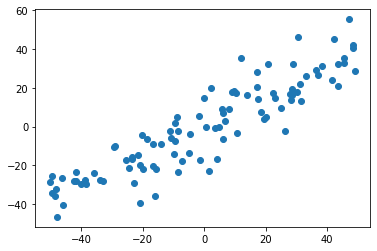

In [29]:
plt.scatter(demean(X)[:,0],demean(X)[:,1])

In [30]:
np.mean(demean(X)[:,0])

-5.684341886080802e-15

In [31]:
np.mean(demean(X)[:,1])

6.0396132539608514e-15

In [35]:
def f(X,w):
    m = len(X)
    return (1./m)*np.sum((X.dot(w)**2))

In [45]:
def df(X,w):
    m = len(X)
    return (1./m)*X.T.dot(X.dot(w))

In [54]:
def df_debug(X,w,epsilon=1e-4):
    m = len(w)
    res = np.empty(m)
    for i in range(0,m):
        w_low = w.copy()
        w_low[i] = w[i] - epsilon
        w_high = w.copy()
        w_high[i] = w[i] + epsilon
        res[i] = (f(X,w_high) - f(X,w_low))-2*epsilon
    return res

In [39]:
X_demean = demean(X)

In [42]:
w_init = np.zeros(len(X_demean[0]))

In [55]:
df_debug(X_demean,w_init)

array([-0.0002, -0.0002])

In [71]:
def direction(w):
    return w/np.linalg.norm(w)

def gradient_ascent(df,X,initial_w = np.array([1,0]),eta=1e-4,n_iter=1e4,epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter<n_iter:
        gradient = df(X,w)
        last_w = w
        w = w+gradient*eta
        w = direction(w)
        delta = abs(f(X,w) - f(X,last_w))
        if delta < epsilon:
            break
        cur_iter += 1
        print(str(cur_iter)+",w="+str(w)+",last_w="+str(last_w)+",delta="+str(delta)+",f="+str(f(X,w))+",f_last="+str(f(X,last_w)))
    return w

In [72]:
gradient_ascent(df,demean(X))

i=1,w=[0.99844182 0.05580266],last_w=[1.08109495 0.06042213],delta=151.2896108018415,f=877.4628226435102,f_last=1028.7524334453517
i=2,w=[0.99399559 0.10942015],last_w=[1.08278212 0.11919387],delta=175.28621422964966,f=939.2464872978599,f_last=1114.5327015275095
i=3,w=[0.98708328 0.16020798],last_w=[1.08121501 0.17548597],delta=198.88724991802962,f=995.3259832418574,f_last=1194.213233159887
i=4,w=[0.97819175 0.20770385],last_w=[1.07681085 0.22864409],delta=221.36682400043242,f=1045.1704461924207,f_last=1266.5372701928532
i=5,w=[0.96782421 0.25162729],last_w=[1.07006807 0.27820995],delta=242.1670338651395,f=1088.653139082845,f_last=1330.8201729479845
i=6,w=[0.95646062 0.29186142],last_w=[1.06151372 0.32391809],delta=260.9263740534914,f=1125.972118393666,f_last=1386.8984924471574
i=7,w=[0.94453036 0.32842413],last_w=[1.05165963 0.36567421],delta=277.47246625555704,f=1157.5551899131083,f_last=1435.0276561686653
i=8,w=[0.93239714 0.36143543],last_w=[1.04097108 0.40352314],delta=291.7910309

i=422,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=423,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=424,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=425,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=426,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=427,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=428,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=429,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973]

i=808,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=809,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=810,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=811,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=812,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=813,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=814,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=815,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973]

i=1334,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=1335,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=1336,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=1337,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=1338,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=1339,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=1340,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=1341,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=1788,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=1789,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=1790,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=1791,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=1792,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=1793,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=1794,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=1795,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=2253,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=2254,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=2255,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=2256,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=2257,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=2258,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=2259,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=2260,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=2710,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=2711,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=2712,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=2713,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=2714,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=2715,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=2716,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=2717,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=3136,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=3137,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=3138,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=3139,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=3140,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=3141,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=3142,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=3143,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=3572,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=3573,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=3574,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=3575,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=3576,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=3577,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=3578,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=3579,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=4135,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=4136,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=4137,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=4138,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=4139,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=4140,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=4141,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=4142,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=4678,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=4679,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=4680,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=4681,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=4682,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=4683,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=4684,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=4685,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=5139,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=5140,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=5141,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=5142,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=5143,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=5144,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=5145,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=5146,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=5560,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=5561,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=5562,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=5563,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=5564,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=5565,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=5566,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=5567,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=6012,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=6013,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=6014,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=6015,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=6016,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=6017,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=6018,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=6019,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=6462,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=6463,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=6464,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=6465,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=6466,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=6467,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=6468,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=6469,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=6891,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=6892,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=6893,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=6894,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=6895,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=6896,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=6897,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=6898,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=7334,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=7335,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=7336,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=7337,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=7338,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=7339,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=7340,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=7341,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=7790,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=7791,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=7792,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=7793,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=7794,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=7795,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=7796,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=7797,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=8198,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=8199,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=8200,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=8201,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=8202,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=8203,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=8204,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=8205,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=8620,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=8621,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=8622,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=8623,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=8624,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=8625,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=8626,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=8627,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=9139,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=9140,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=9141,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=9142,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=9143,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=9144,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=9145,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=9146,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

i=9691,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=9692,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=9693,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=9694,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=9695,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=9696,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614667,f=1298.2044757411809,f_last=1657.1505405026476
i=9697,w=[0.77842576 0.62773668],last_w=[0.87948134 0.70922973],delta=358.9460647614658,f=1298.2044757411813,f_last=1657.1505405026471
i=9698,w=[0.77842576 0.62773668],last_w=[0.87948134 0.7

array([0.77842576, 0.62773668])

In [75]:
import numpy as np

def demean(X):
    return X - np.mean(X,axis=0)


def f(X, w):
    m = len(X)
    return (1. / m) * np.sum((X.dot(w) ** 2))


def df(X, w):
    m = len(X)
    return (1. / m) * X.T.dot(X.dot(w))


def df_debug(X, w, epsilon=1e-4):
    m = len(w)
    res = np.empty(m)
    for i in range(0, m):
        w_low = w.copy()
        w_low[i] = w[i] - epsilon
        w_high = w.copy()
        w_high[i] = w[i] + epsilon
        res[i] = (f(X, w_high) - f(X, w_low)) - 2 * epsilon
    return res


def direction(w):
    return w / np.linalg.norm(w)


def gradient_ascent(df, X, initial_w=np.array([1, 0]), eta=1e-4, n_iter=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iter:
        gradient = df(X, w)
        last_w = w
        w = w + gradient * eta
        w = direction(w)
        delta = abs(f(X, w) - f(X, last_w))
        if delta < epsilon:
            break
        cur_iter += 1
        print(str(cur_iter) + ",w=" + str(w) + ",last_w=" + str(last_w) + ",delta=" + str(delta) + ",f=" + str(
            f(X, w)) + ",f_last=" + str(f(X, last_w)))
    return w

if __name__ == '__main__':
    X = np.empty([100, 2])
    X[:, 0] = np.random.uniform(low=0., high=100., size=100)
    X[:, 1] = 0.75 * X[:, 0] + 3
    gradient_ascent(df, demean(X))

1,w=[0.99826661 0.05885379],last_w=[1. 0.],delta=73.89270743522388,f=927.0364102696211,f_last=853.1437028343972
2,w=[0.9933978  0.11472058],last_w=[0.99826661 0.05885379],delta=67.03545412762196,f=994.0718643972431,f_last=927.0364102696211
3,w=[0.98596727 0.16693872],last_w=[0.9933978  0.11472058],delta=59.30610167009252,f=1053.3779660673356,f_last=994.0718643972431
4,w=[0.97659337 0.21509391],last_w=[0.98596727 0.16693872],delta=51.31329439673891,f=1104.6912604640745,f_last=1053.3779660673356
5,w=[0.96587764 0.25899881],last_w=[0.97659337 0.21509391],delta=43.549795850109376,f=1148.2410563141839,f_last=1104.6912604640745
6,w=[0.95436155 0.29865368],last_w=[0.96587764 0.25899881],delta=36.36007171406163,f=1184.6011280282455,f_last=1148.2410563141839
7,w=[0.94250235 0.33419952],last_w=[0.95436155 0.29865368],delta=29.944204004753146,f=1214.5453320329987,f_last=1184.6011280282455
8,w=[0.93066491 0.36587269],last_w=[0.94250235 0.33419952],delta=24.383404389654515,f=1238.9287364226532,f_la